<a href="https://colab.research.google.com/github/aakashkumar089/Class-notes/blob/main/OTS_MLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Text(0.5, 1.0, 'Newspaper Spend')

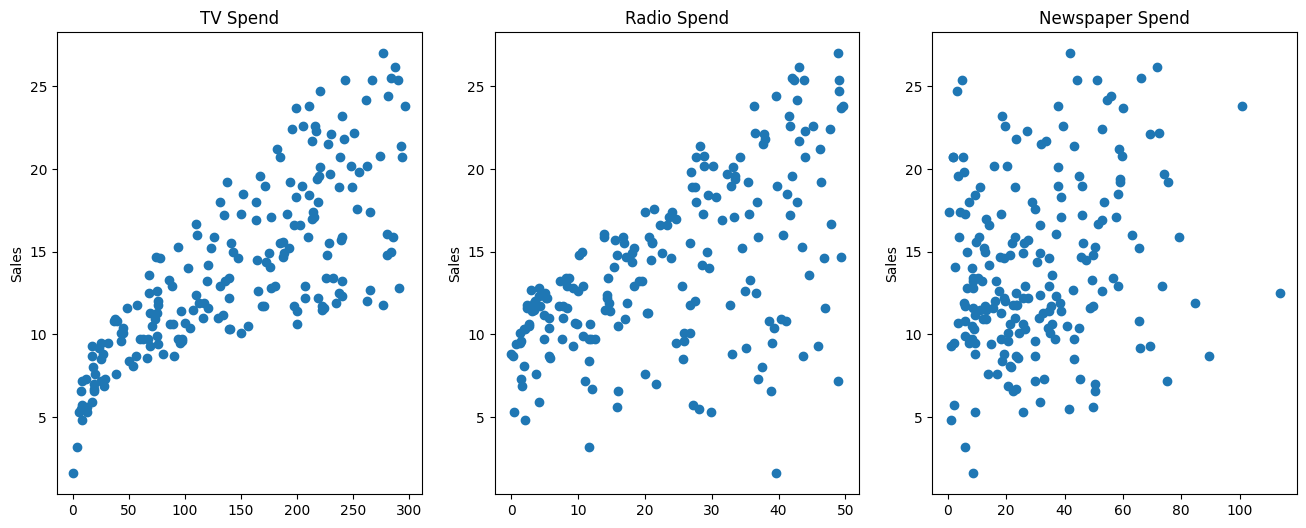

In [4]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel('Sales')
axes[0].set_title("TV Spend")


axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_ylabel('Sales')
axes[1].set_title("Radio Spend")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_ylabel('Sales')
axes[2].set_title("Newspaper Spend")

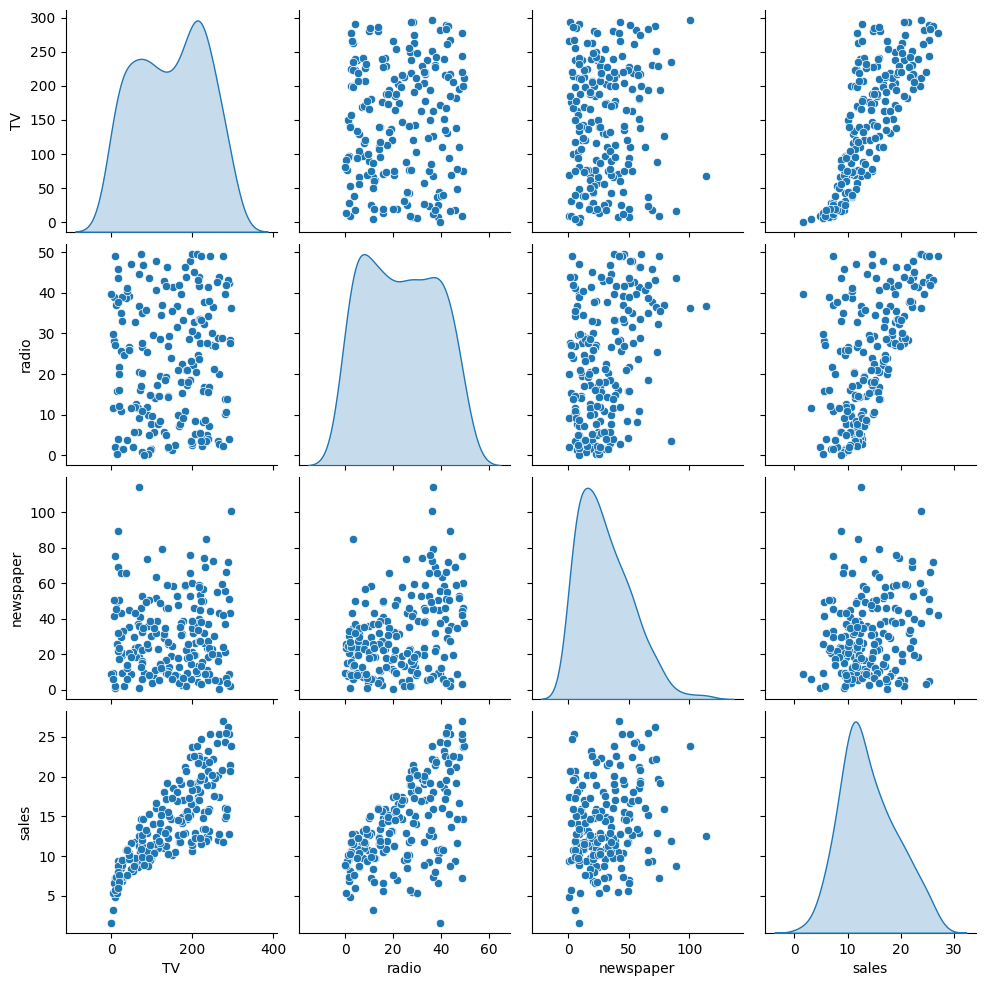

In [5]:
# Relationship between the features

sns.pairplot(df,diag_kind='kde')

In [6]:
X = df.drop('sales',axis=1)
y= df['sales']

In [7]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [8]:
y

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [9]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [11]:
X_train.shape

(140, 3)

In [12]:
X_test.shape

(60, 3)

In [13]:
y_test.shape

(60,)

In [14]:
y_train

,sales
169,15.0
97,15.5
31,11.9
12,9.2
35,12.8
...,...
106,7.2
14,19.0
92,19.4
179,12.6


In [15]:
# Train the model (Use the Estimator)
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression()

In [17]:
# Fit/Train the model on training data

model.fit(X_train,y_train)

LinearRegression()

In [18]:
model.coef_ # Slope/m1/theta1/beta1

array([0.04405928, 0.1992875 , 0.00688245])

In [19]:
model.intercept_ # intercept/beta0/theta0

np.float64(2.7089490925159065)

## simple LR

## y = mx + b

### MLR

### y = B0(intercept) + B1(co-effficient)x1 + B2x2 + B3x3 + B4x4.......BnXn


In [20]:
test_predictions = model.predict(X_test)

In [21]:
test_predictions

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [22]:
y_test

,sales
95,16.9
15,22.4
30,21.4
158,7.3
128,24.7
115,12.6
69,22.3
170,8.4
174,11.5
45,14.9


In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [24]:
MAE = mean_absolute_error(y_test, test_predictions)

print(MAE)

1.5116692224549086


In [25]:
MSE = mean_squared_error(y_test,test_predictions)
print(MSE)

3.79679723671522


In [26]:
R2_score = r2_score(y_test,test_predictions)
print(R2_score)

0.8609466508230368


In [27]:
RMSE = np.sqrt(MSE)
print(RMSE)

1.9485372043446387


In [30]:
X.columns

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [28]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.044059
radio,0.199287
newspaper,0.006882


In [32]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [34]:
#Prediction
campaign = [[149,22,12]]

In [35]:
model.predict(campaign)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.74069631])

In [36]:
campaign2 = [[44,39,45]]
model.predict(campaign2)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12.72948018])

In [39]:
campaign3 = [[17,45,69]]


In [40]:
model.predict(campaign3)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12.90078343])

In [44]:
from joblib import dump,load

In [45]:
dump(model,'my_first_model.joblib')

['my_first_model.joblib']

In [46]:
loded_model = load('/content/my_first_model.joblib')

In [47]:
loded_model.predict(campaign3)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12.90078343])